# MNIST Classification

version 1.0

## 데이터 불러오기

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)
        
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
pyplot.show()

In [2]:
# 아래 링크 수정

In [3]:
tr = list(read("training", r"C:\Users\Mecors\Downloads"))
te = list(read("testing", r"C:\Users\Mecors\Downloads"))

In [4]:
len(tr)

60000

In [5]:
len(te)

10000

In [6]:
import pandas as pd

In [7]:
label, pixel = tr[0]
pixel = pixel.reshape(784)
tr_label = np.array((label))
tr_image = pixel

for i in range(1, 1000): #숫자 수정 필요!
    temp_label, temp_pixel = tr[i]
    temp_pixel = temp_pixel.reshape(784)
    tr_image = np.vstack((tr_image, temp_pixel))
    tr_label = np.vstack((tr_label, temp_label))

In [8]:
print(tr_image.shape)
print(tr_label.shape)

(1000, 784)
(1000, 1)


In [9]:
#트레이닝 데이터 프래임 만들기
tr_data = np.hstack((tr_image, tr_label))
tr_data_df = pd.DataFrame(tr_data)
tr_data_df = tr_data_df.rename(columns={784:"label"})

X_tr_data = tr_data_df.drop('label', axis=1)
y_tr_data = tr_data_df['label']

In [10]:
X_tr_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_tr_data.shape

(1000,)

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

st_scarler = StandardScaler()
mm_scarler = MinMaxScaler()

X_tr_st = pd.DataFrame(st_scarler.fit_transform(X_tr_data))
X_tr_mm = pd.DataFrame(mm_scarler.fit_transform(X_tr_data))

In [13]:
X_tr_st.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041522,-0.031639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041522,-0.031639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041522,-0.031639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041522,-0.031639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041522,-0.031639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Stratified KFold Cross Validation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
svm = SVC()



def exec_Skfold(clf, folds=5) :
    Skfold=StratifiedKFold(n_splits=folds)
    scores=[]
    
    for iter_counts, (train_index, test_index) in enumerate(Skfold.split(X_tr_st, y_tr_data)):
        X_train, X_test = X_tr_st.values[train_index], X_tr_st.values[test_index]
        y_train, y_test = y_tr_data.values[train_index], y_tr_data.values[test_index]
        
        print('## 교차검증 : {0}'.format(iter_counts))
        print('학습 레이블 데이터 분포 :\n', pd.Series(y_train).value_counts())
        print('검증 레이블 데이터 분포 :\n', pd.Series(y_test).value_counts())
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 :{1:.4f}".format(iter_counts, accuracy))
        
        print("\n")
        
    mean_score = np.mean(scores)
    print("평균 정확도 :{0:.4f}".format(mean_score))
    print("\n")
    
exec_Skfold(lr_clf, folds=5)
exec_Skfold(svm, folds=5)

## 교차검증 : 0
학습 레이블 데아터 분포 :
 7    93
1    92
4    84
9    80
2    79
0    77
6    75
3    74
5    73
8    69
dtype: int64
검증 레이블 데이터 분포 :
 7    24
1    24
4    21
9    20
2    20
0    20
6    19
5    19
3    19
8    18
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


교차 검증 0 정확도 :0.7794


## 교차검증 : 1
학습 레이블 데아터 분포 :
 7    93
1    93
4    84
9    80
2    79
0    77
6    75
3    74
5    73
8    69
dtype: int64
검증 레이블 데이터 분포 :
 7    24
1    23
4    21
9    20
2    20
0    20
6    19
5    19
3    19
8    18
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


교차 검증 1 정확도 :0.8522


## 교차검증 : 2
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    79
0    78
6    75
5    74
3    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    20
6    19
3    19
0    19
5    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


교차 검증 2 정확도 :0.8090


## 교차검증 : 3
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    79
0    78
6    75
3    75
5    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    20
6    19
0    19
5    18
3    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


교차 검증 3 정확도 :0.7778


## 교차검증 : 4
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    80
0    78
6    76
3    75
5    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    19
0    19
6    18
5    18
3    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


교차 검증 4 정확도 :0.7704


평균 정확도 :0.7978


## 교차검증 : 0
학습 레이블 데아터 분포 :
 7    93
1    92
4    84
9    80
2    79
0    77
6    75
3    74
5    73
8    69
dtype: int64
검증 레이블 데이터 분포 :
 7    24
1    24
4    21
9    20
2    20
0    20
6    19
5    19
3    19
8    18
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


교차 검증 0 정확도 :0.8824


## 교차검증 : 1
학습 레이블 데아터 분포 :
 7    93
1    93
4    84
9    80
2    79
0    77
6    75
3    74
5    73
8    69
dtype: int64
검증 레이블 데이터 분포 :
 7    24
1    23
4    21
9    20
2    20
0    20
6    19
5    19
3    19
8    18
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


교차 검증 1 정확도 :0.8768


## 교차검증 : 2
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    79
0    78
6    75
5    74
3    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    20
6    19
3    19
0    19
5    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


교차 검증 2 정확도 :0.8141


## 교차검증 : 3
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    79
0    78
6    75
3    75
5    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    20
6    19
0    19
5    18
3    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


교차 검증 3 정확도 :0.8687


## 교차검증 : 4
학습 레이블 데아터 분포 :
 7    94
1    93
4    84
9    80
2    80
0    78
6    76
3    75
5    74
8    70
dtype: int64
검증 레이블 데이터 분포 :
 7    23
1    23
4    21
9    20
2    19
0    19
6    18
5    18
3    18
8    17
dtype: int64


C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


교차 검증 4 정확도 :0.8469


평균 정확도 :0.8578




In [15]:
# StratifiedKfold 시각화
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

"""import matplotlib.pyplot as plt

# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')


def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax


fig, ax = plt.subplots()
cv = StratifiedKFold(5)
plot_cv_indices(cv, X_tr_st, y_tr_data, groups, ax, n_splits)"""

'import matplotlib.pyplot as plt\n\n# Generate the class/group data\nn_points = 100\nX = np.random.randn(100, 10)\n\npercentiles_classes = [.1, .3, .6]\ny = np.hstack([[ii] * int(100 * perc)\n               for ii, perc in enumerate(percentiles_classes)])\n\n# Evenly spaced groups repeated once\ngroups = np.hstack([[ii] * 10 for ii in range(10)])\n\n\ndef visualize_groups(classes, groups, name):\n    # Visualize dataset groups\n    fig, ax = plt.subplots()\n    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker=\'_\',\n               lw=50, cmap=cmap_data)\n    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker=\'_\',\n               lw=50, cmap=cmap_data)\n    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],\n           yticklabels=[\'Data\ngroup\', \'Data\nclass\'], xlabel="Sample index")\n\n\nvisualize_groups(y, groups, \'no groups\')\n\n\ndef plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):\n\n    # Generate the training/testing visualizations for 

In [16]:
#cross_val_score 또 하나의 방법, 둘중 시각화 좀 더 쉬운거로 선택하는 것이...?

'''
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

skf = StratifiedKFold(5)
lr_clf = LogisticRegression()
svm = SVC()

scores = cross_val_score(lr_clf, tr_image, tr_label, scoring='accuracy', cv=skf)
print('Logistic Regression 교차 검증별 정확도 :', np.round(scores, 4))
print('Logistic Regression 평균 검증 정확도 :', np.round(np.mean(scores), 4))
scores = cross_val_score(svm, tr_image, tr_label, scoring='accuracy', cv=skf)
print('SVM 교차 검증별 정확도 :', np.round(scores, 4))
print('SVM 평균 검증 정확도 :', np.round(np.mean(scores), 4))
'''

"\nfrom sklearn.model_selection import cross_val_score, cross_validate\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\n\nskf = StratifiedKFold(5)\nlr_clf = LogisticRegression()\nsvm = SVC()\n\nscores = cross_val_score(lr_clf, tr_image, tr_label, scoring='accuracy', cv=skf)\nprint('Logistic Regression 교차 검증별 정확도 :', np.round(scores, 4))\nprint('Logistic Regression 평균 검증 정확도 :', np.round(np.mean(scores), 4))\nscores = cross_val_score(svm, tr_image, tr_label, scoring='accuracy', cv=skf)\nprint('SVM 교차 검증별 정확도 :', np.round(scores, 4))\nprint('SVM 평균 검증 정확도 :', np.round(np.mean(scores), 4))\n"

## Model Choice

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr_st, y_tr_data, test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mecors\Anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## HyperParameter

In [19]:
'''
from sklearn.model_selection import GridSearchCV

grid_parameters = {'max_depth' : [1, 2, 3],
                  'min_samples_split' : [2, 3]
                   
                  } #모델 선택 후 조정
                  
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\ngrid_parameters = {'max_depth' : [1, 2, 3],\n                  'min_samples_split' : [2, 3]\n                   \n                  } #모델 선택 후 조정\n                  \n"

## Evaluation

[[29  0  0  0  0  0  1  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  3 20  2  0  0  0  0  3  0]
 [ 3  1  1 21  0  1  0  1  0  5]
 [ 0  0  1  0 30  1  0  1  0  2]
 [ 1  0  1  4  2 23  1  0  1  0]
 [ 1  3  0  0  0  0 24  0  0  0]
 [ 0  2  1  0  1  0  0 23  0  3]
 [ 0  3  1  0  1  4  1  1 19  1]
 [ 0  0  0  0  3  0  1  3  0 19]]
True
True
True
True
True
True
True
True
True
True
Precision Score : 
 [0.8529 0.6842 0.8    0.7778 0.8108 0.7931 0.8571 0.7931 0.8261 0.6333]
Recall Score : 
 [0.9667 1.     0.7143 0.6364 0.8571 0.697  0.8571 0.7667 0.6129 0.7308]


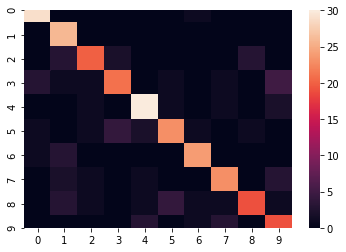

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)
print(cm)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

l = 300 #숫자 수정 필요!
for i in range(num_classes):
    print(TP[i] + FP[i] + FN[i] + TN[i] == l)

precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision Score : \n", np.round(precision, 4))
print("Recall Score : \n", np.round(recall, 4))

sns.heatmap(cm)
#파라미터 조정

In [21]:
#https://ieeexplore.ieee.org/document/6471714

from sklearn.metrics import precision_score

micro = precision_score(y_test, pred, average='micro')
macro = precision_score(y_test, pred, average='macro')
weighted = precision_score(y_test, pred, average='weighted')
'''
<micro precision>
Calculate metrics globally by counting the total true positives, 
false negatives and false positives.
'''
print("micro precision :{0:.5f}".format(micro))
'''
<macro precision>
Calculate metrics for each label, and find their unweighted mean. 
This does not take label imbalance into account.
'''
print("macro precision :{0:.5f}".format(macro))

'''
<weighted precision>
Calculate metrics for each label, 
and find their average weighted by support 
(the number of true instances for each label). 
This alters ‘macro’ to account for label imbalance; 
it can result in an F-score that is not between precision and recall.
'''
print("weighted precision :{0:.5f}".format(weighted))

micro precision :0.78000
macro precision :0.78285
weighted precision :0.78621


In [22]:
from sklearn.metrics import recall_score

micro = recall_score(y_test, pred, average='micro')
macro = recall_score(y_test, pred, average='macro')
weighted = recall_score(y_test, pred, average='weighted')
'''
<micro precision>
Calculate metrics globally by counting the total true positives, 
false negatives and false positives.

'''
print("micro recall :{0:.5f}".format(micro))
'''
<macro precision>
Calculate metrics for each label, and find their unweighted mean. 
This does not take label imbalance into account
'''
print("macro recall :{0:.5f}".format(macro))

'''
<weighted precision>
Calculate metrics for each label, 
and find their average weighted by support 
(the number of true instances for each label). 
This alters ‘macro’ to account for label imbalance; 
it can result in an F-score that is not between precision and recall.

'''
print("weighted recall :{0:.5f}".format(weighted))

micro recall :0.78000
macro recall :0.78389
weighted recall :0.78000


In [23]:
# 무엇을 선택하느냐에 따라 F1 Score도 변경될듯

# ROC Curve

In [24]:
'''
from sklearn.metrics import roc_curve, auc

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([FP[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, FP[i], TP[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
'''

'\nfrom sklearn.metrics import roc_curve, auc\n\n# Compute macro-average ROC curve and ROC area\n\n# First aggregate all false positive rates\nn_classes = 10\nall_fpr = np.unique(np.concatenate([FP[i] for i in range(n_classes)]))\n\n# Then interpolate all ROC curves at this points\nmean_tpr = np.zeros_like(all_fpr)\nfor i in range(n_classes):\n    mean_tpr += interp(all_fpr, FP[i], TP[i])\n\n# Finally average it and compute AUC\nmean_tpr /= n_classes\n\nfpr["macro"] = all_fpr\ntpr["macro"] = mean_tpr\nroc_auc["macro"] = auc(fpr["macro"], tpr["macro"])\n\n\n# Plot all ROC curves\nplt.figure()\nplt.plot(fpr["micro"], tpr["micro"],\n         label=\'micro-average ROC curve (area = {0:0.2f})\'\n               \'\'.format(roc_auc["micro"]),\n         color=\'deeppink\', linestyle=\':\', linewidth=4)\n\nplt.plot(fpr["macro"], tpr["macro"],\n         label=\'macro-average ROC curve (area = {0:0.2f})\'\n               \'\'.format(roc_auc["macro"]),\n         color=\'navy\', linestyle=\':\', li